<a href="https://colab.research.google.com/github/Virgiawanlistiyanto19/Penerapan-Model-Neural-Network-Deteksi-Gesture-Tangan-untuk-Transfer-Gambar-ke-Perangkat-Mobile/blob/main/Project_UAS_Kecerdasan_Buatan_Kel_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penerapan Model Neural Network Deteksi Gesture Tangan untuk Transfer Gambar ke Perangkat Mobile



#**Kelompok 5**
###Anggota Kelompok
######Muhamad Akmal Hidayat
######Muhamad Hidayah Nurdjati
######Mohammad Asyif Raza
######Maula Ibrahim Syahwi
######Virgiawan Listiyanto
######Muhammad Zidan
######Ibnu Sabil Adriza
######Arzaid Albani







# 1.Import Library

In [ ]:

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns


# 2.Membuat Dataset

In [ ]:
# Nama folder dataset
dataset_folder = "dataset/dataset"

# Daftar label gesture (nama folder di dalam dataset)
labels = ['open', 'mencengkram', 'genggam', 'geser_kanan', 'geser_kiri', 'lepas']

# Ukuran citra input untuk model
img_size = (64, 64)


# 3.Load Dataset

In [ ]:
X = []
y = []

print("📥 Membaca dataset gambar & video...")

for idx, label in enumerate(labels):
    folder_path = os.path.join(dataset_folder, label)
    files = os.listdir(folder_path)

    for file in files:
        file_path = os.path.join(folder_path, file)
        ext = os.path.splitext(file)[-1].lower()

        if ext in ['.jpg', '.jpeg', '.png']:
            # membaca gambar pergesture
            img = cv2.imread(file_path)
            img = cv2.resize(img, img_size)
            img = img / 255.0
            X.append(img)
            y.append(idx)

        elif ext in ['.avi', '.mp4']:
            # membaca semua video pergesture
            cap = cv2.VideoCapture(file_path)
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame = cv2.resize(frame, img_size)
                frame = frame / 255.0
                X.append(frame)
                y.append(idx)
            cap.release()
        else:
            print(f"⚠️ File tidak dikenali: {file_path}")

print("✅ Dataset berhasil dibaca.")


📥 Membaca dataset gambar & video...
✅ Dataset berhasil dibaca.


# 4.Preprocessing Data

In [ ]:
X = np.array(X, dtype=np.float32)
y = np.array(y)

print(f"Total data: {X.shape[0]} samples.")

y_cat = to_categorical(y, num_classes=len(labels))


Total data: 19514 samples.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)

print(f"Training set: {X_train.shape[0]} | Test set: {X_test.shape[0]}")


Training set: 15611 | Test set: 3903


# 5.Membangun Model Neural Network (NN)

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(labels), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

# 6.Training Model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32
)


Epoch 1/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 112s 229ms/step - accuracy: 0.9365 - loss: 0.1946 - val_accuracy: 0.9951 - val_loss: 0.0371
Epoch 2/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 101s 207ms/step - accuracy: 0.9917 - loss: 0.0304 - val_accuracy: 0.9944 - val_loss: 0.0160
Epoch 3/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 139s 200ms/step - accuracy: 0.9952 - loss: 0.0161 - val_accuracy: 0.9956 - val_loss: 0.0099
Epoch 4/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 144s 204ms/step - accuracy: 0.9964 - loss: 0.0100 - val_accuracy: 0.9980 - val_loss: 0.0072
Epoch 5/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 99s 202ms/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 0.9972 - val_loss: 0.0069
Epoch 6/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 100s 205ms/step - accuracy: 0.9976 - loss: 0.0080 - val_accuracy: 0.9985 - val_loss: 0.0036
Epoch 7/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 141s 203ms/step - accuracy: 0.9965 - loss: 0.0080 - val_accuracy: 0.9980 - val_loss: 0.0036
Epoch 8/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 99s 203ms/step - accuracy: 0.9977 - l

# 7.Evaluasi Model

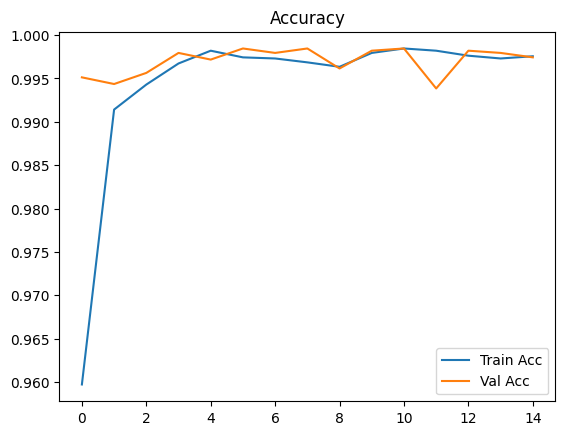

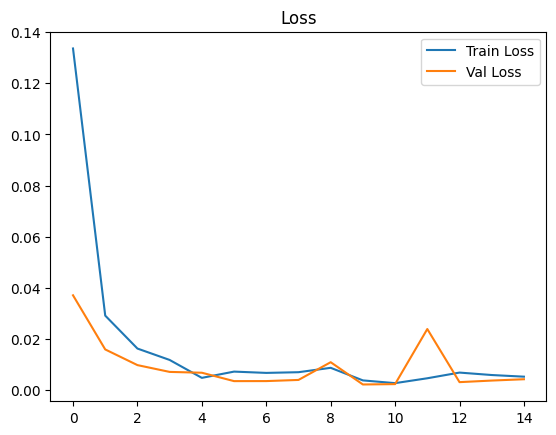

122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9973 - loss: 0.0047
🎯 Test Accuracy: 99.74%


In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {test_acc*100:.2f}%")


# 8.Contoh gesture tangan dari dataset

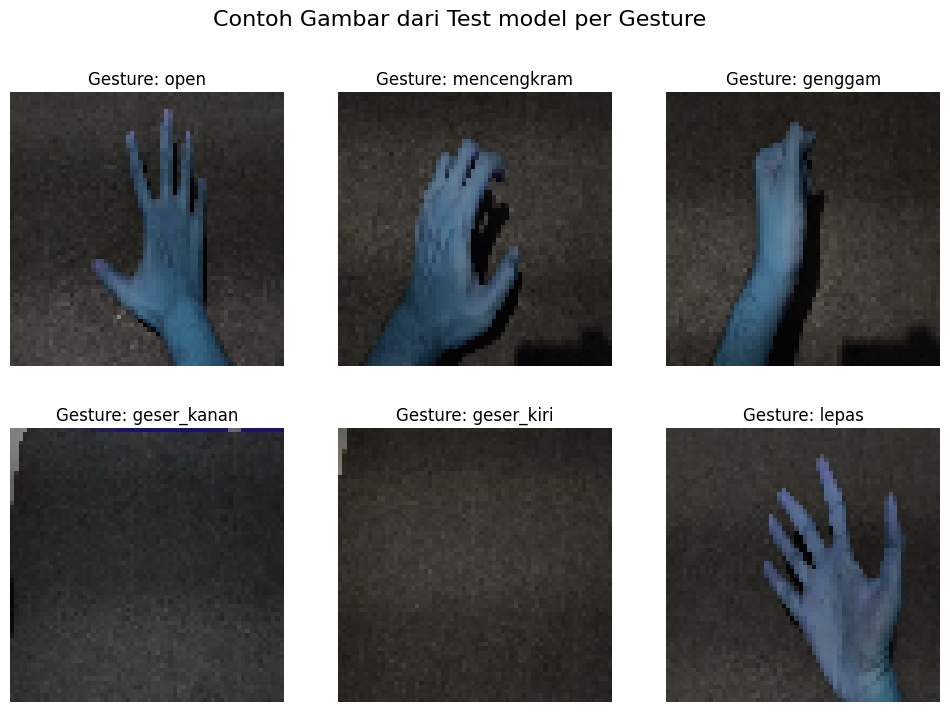

In [ ]:


plt.figure(figsize=(12, 8))

for idx, label in enumerate(labels):

    idxs = np.where(np.argmax(y_test, axis=1) == idx)[0]
    if len(idxs) == 0:
        continue
    sample_idx = random.choice(idxs)
    img = X_test[sample_idx]

    plt.subplot(2, 3, idx+1)
    plt.imshow(img)
    plt.title(f"Gesture: {label}")
    plt.axis("off")

plt.suptitle("Contoh Gambar dari Test model per Gesture", fontsize=16)
plt.show()


# 9 Menyimpan dataset untuk di implementasikan

In [ ]:
model.save("gesture_nn_model.h5")
print("✅ Model disimpan")


✅ Model disimpan
